In [26]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [27]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [28]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [29]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [30]:
# Reference Section 10, Day 2, Module 6
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [31]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [32]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [33]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [34]:
# Run Inspector to see what data is in the tables
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [35]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [36]:
# Find the most recent date in the data set.
# Reference Section 10, Day 3, Module 2
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

Text(0, 0.5, 'Precipitation in Inches')

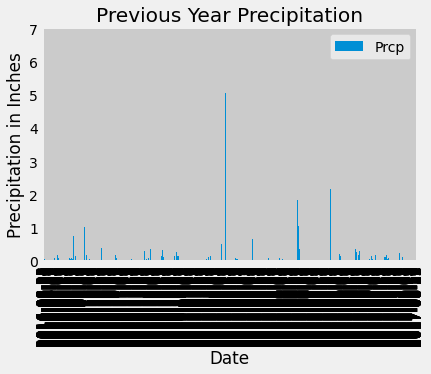

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
# Reference Section 10, Day 3, Module 2

previous_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
# Reference Section 10, Day 3, Module 3

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
# Reference Section 10, Day 2, Module 9

previous_year_df = pd.DataFrame(results, columns=['Date', 'Prcp'])
previous_year_df.set_index('Date', inplace=True, )
previous_year_df.head()

# Sort the dataframe by date
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

previous_year_df = previous_year_df.sort_values('Date')


# Use Pandas Plotting with Matplotlib to plot the data
# Reference Section 5, Day 2, Module 2

previous_year_df.plot(kind="bar")

plt.title("Previous Year Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")




                                                                   

In [52]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# Not clear on what type of statistics so showed .describe

previous_year_df.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [55]:
agg_method_df = previous_year_df

In [56]:
# Showed summary statistics table of mean, median, variance, standard deviation, and SEM of the Prcp for each Date
# Reference Matplotlib homework

agg_func_math = {
    'Prcp':
    ['mean', 'median', 'var', 'std', 'sem']
}
agg_method_df.groupby(['Date']).agg(agg_func_math).round(2)

Prcp                         
            mean median   var   std   sem
Date                                     
2016-08-23  0.45   0.10  0.50  0.71  0.29
2016-08-24  1.56   1.80  0.71  0.84  0.34
2016-08-25  0.08   0.08  0.01  0.07  0.03
2016-08-26  0.02   0.02  0.00  0.02  0.01
2016-08-27  0.06   0.02  0.01  0.08  0.04
...          ...    ...   ...   ...   ...
2017-08-19  0.03   0.00  0.00  0.05  0.03
2017-08-20  0.00   0.00  0.00  0.01  0.00
2017-08-21  0.19   0.02  0.10  0.32  0.18
2017-08-22  0.17   0.00  0.08  0.29  0.17
2017-08-23  0.13   0.04  0.05  0.22  0.11

[366 rows x 5 columns]

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()